In [1]:
import pandas as pd

wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'

wine = pd.read_csv(wine_url, index_col=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [2]:
# 맛 등급 컬럼 추가

wine['taste'] = [1 if grade > 5 else 0 for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis = 1)
y = wine['taste']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2, random_state=13)

LogisticRegression 의 옵션 

- solver : 최적화할 때 사용할 알고리즘으로
    - liblinear : 작은 데이터 세트인 경우 좋으며 일대일 방식으로 제한됨
    - sag or saga : 큰 데이터 세트
    - newton-cg or sag or saga or lbfgs : 다중 클래스 문제

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver= 'liblinear' , random_state=13)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test  = lr.predict(X_test)

print("Train acc : ", accuracy_score(y_train, y_pred_tr))
print("Test acc : ", accuracy_score(y_test, y_pred_test))

Train acc :  0.7429286126611506
Test acc :  0.7446153846153846


파이프라인 구축해보기

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

estimators = [
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='liblinear', random_state=13))
]

pipe = Pipeline(estimators)

In [6]:
pipe.fit(X_train, y_train)

y_pred_tr = pipe.predict(X_train)
y_pred_test  = pipe.predict(X_test)

print("Train acc : ", accuracy_score(y_train, y_pred_tr))
print("Test acc : ", accuracy_score(y_test, y_pred_test))

Train acc :  0.7444679622859341
Test acc :  0.7469230769230769


Decision Tree도 실습해보자.

In [10]:
from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

models = {
    'logistic regression' : pipe, 
    'decision tree' : wine_tree
}

In [11]:
models.items()

dict_items([('logistic regression', Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=13, solver='liblinear'))])), ('decision tree', DecisionTreeClassifier(max_depth=2, random_state=13))])

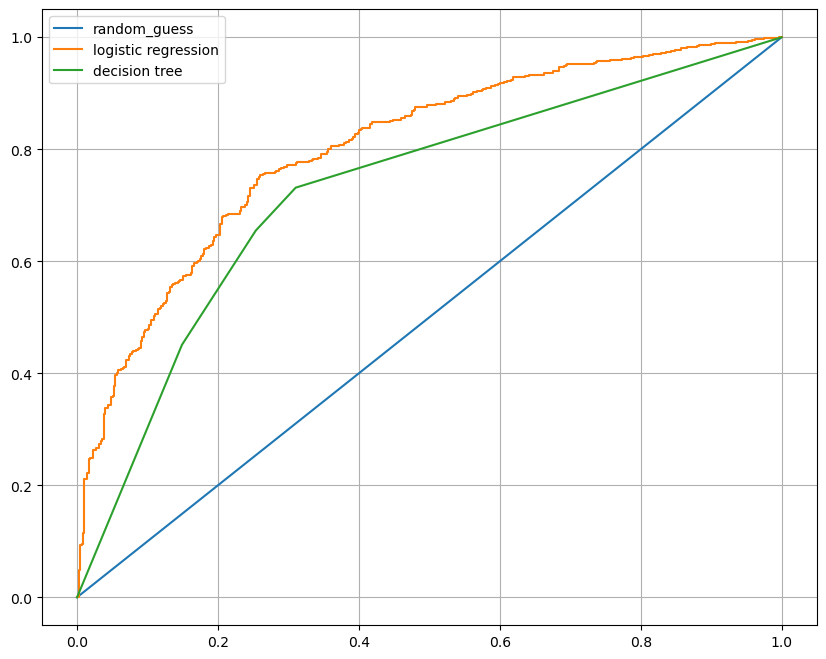

In [12]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
plt.plot([0,1], [0,1], label = 'random_guess')

for model_name, model in models.items():
    pred = model.predict_proba(X_test)[:, 1] # 첫번째 컬럼은 0일 확률이므로 1일 확률인 두번째 컬럼을 추출해야함
    fpr, tpr, thresholds = roc_curve(y_test, pred)

    plt.plot(fpr, tpr, label = model_name)

plt.grid()
plt.legend()
plt.show()

roc curve를 그려보았을 땐 decision tree 보단 logistic regression의 성능이 조금 더 좋아보임

## PIMA 인디언 당뇨병 예측

50년대 까지 PIMA 인디언은 당뇨가 없었는데 20세기 말 갑자기 인구의 50%가 당뇨에 걸리게 되면서 데이터 분석에 흥미로운 주제로 다가오게 되었다. 

원래 데이터는 캐글에 있다!

In [13]:
PIMA_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/diabetes.csv'

PIMA = pd.read_csv(PIMA_url)
PIMA.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
# 전부 float형으로 변환

PIMA = PIMA.astype('float')
PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


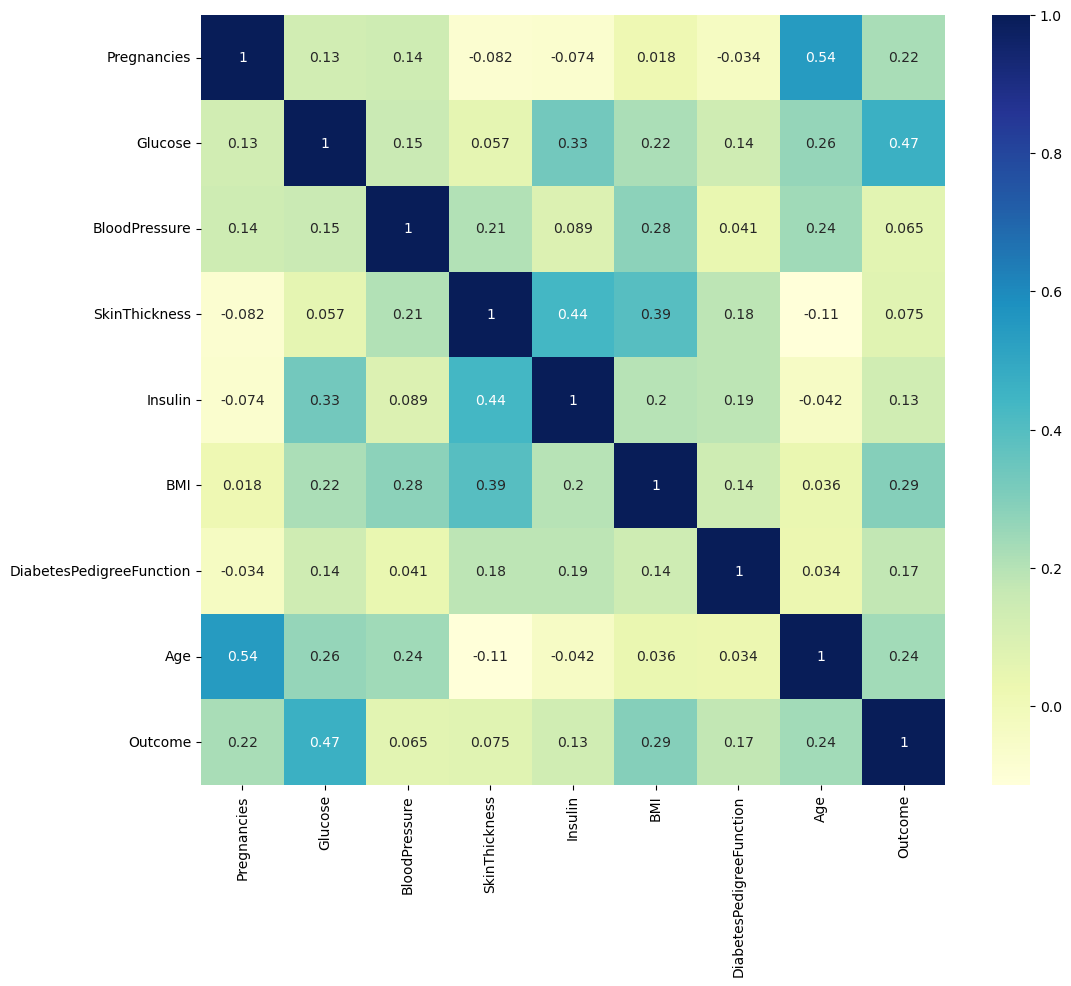

In [18]:
# 상관관계

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(PIMA.corr(), annot=True, cmap = "YlGnBu")
plt.show()

In [19]:
(PIMA == 0).astype(int).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

결측치는 데이터에 따라 그 정의가 다른데, nan / null / 0 / - 등 여러가지가 있을 수 있다.

그래서 해당 데이터가 결측치인지 확인하는 것도 중요한데 

위 데이터에서 Glucose(포도당 부하 검사 수치), BloodPressure(혈압), SkinThickness(팔 삼두근 뒤쪽의 피하지방 측정값), BMI(체질량지수)들이 0인 것은 결측치로 봐도 될 것 같다.

In [20]:
# 결측치 채워넣기
# 채워넣는 방법에도 여러가지가 있는데 지금은 평균값으로 대체해보자.

zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
PIMA[zero_features] = PIMA[zero_features].replace(0, PIMA[zero_features].mean())

(PIMA == 0).astype(int).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

X = PIMA.drop(['Outcome'], axis = 1)
y = PIMA['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2, 
                                                    stratify=y, 
                                                    random_state=13)

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

estimators = [
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='liblinear', random_state=13))
]

pipe_lr = Pipeline(estimators)
pipe_lr.fit(X_train, y_train)
pred = pipe_lr.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score, f1_score

print('Accuracy : ', accuracy_score(y_test, pred))
print('Recall : ', recall_score(y_test, pred))
print('Precision : ', precision_score(y_test, pred))
print('ROC AUC score : ', roc_auc_score(y_test, pred))
print('F1 score : ', f1_score(y_test, pred))

Accuracy :  0.7727272727272727
Recall :  0.6111111111111112
Precision :  0.7021276595744681
ROC AUC score :  0.7355555555555556
F1 score :  0.6534653465346535


모델의 feature importance 확인

In [33]:
pipe_lr['clf'].feature_importances_

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [25]:
# 8개의 features가 쓰였으니 각 계수값도 확인할 수 있다.
# Logistic Regression 에서는 각 계수값이 feature importance이다.

pipe_lr['clf'].coef_

array([[ 0.35426589,  1.20142444, -0.15840136,  0.03394658, -0.16286472,
         0.62040452,  0.36669356,  0.17195965]])

In [26]:
coef = list(pipe_lr['clf'].coef_[0])
labels = list(X_train.columns)

In [27]:
# feature들의 중요도

features = pd.DataFrame(
    {'Features' : labels, 'importance' : coef}
)

features.sort_values(by = ['importance'], ascending=True, inplace=True)
features

,Features,importance
4,Insulin,-0.162865
2,BloodPressure,-0.158401
3,SkinThickness,0.033947
7,Age,0.171960
0,Pregnancies,0.354266
6,DiabetesPedigreeFunction,0.366694
5,BMI,0.620405
1,Glucose,1.201424


In [28]:
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features

,importance,positive
Features,,
Insulin,-0.162865,False
BloodPressure,-0.158401,False
SkinThickness,0.033947,True
Age,0.171960,True
Pregnancies,0.354266,True
DiabetesPedigreeFunction,0.366694,True
BMI,0.620405,True
Glucose,1.201424,True


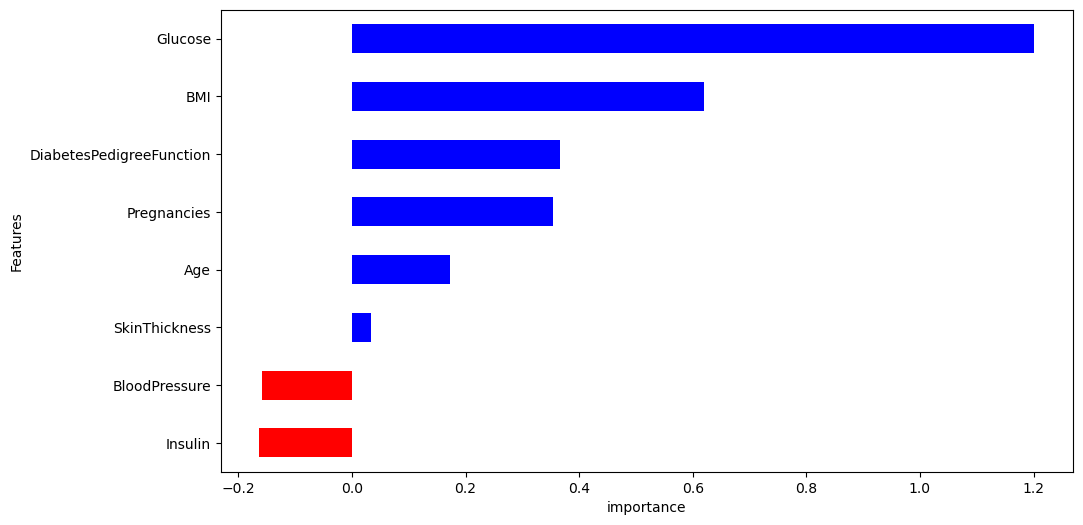

In [29]:
features['importance'].plot(kind = 'barh',
                            figsize = (11,6),
                            color = features['positive'].map({True : 'blue', False : "red"}))
plt.xlabel('importance')
plt.show()

## 정밀도와 재현율

In [34]:
import pandas as pd

wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'

wine = pd.read_csv(wine_url, index_col=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [35]:
wine['taste'] = [1 if grade > 5 else 0 for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis = 1)
y = wine['taste']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2, random_state=13)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver= 'liblinear' , random_state=13)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test  = lr.predict(X_test)

print("Train acc : ", accuracy_score(y_train, y_pred_tr))
print("Test acc : ", accuracy_score(y_test, y_pred_test))

Train acc :  0.7429286126611506
Test acc :  0.7446153846153846


In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.58      0.62       477
           1       0.77      0.84      0.81       823

    accuracy                           0.74      1300
   macro avg       0.73      0.71      0.72      1300
weighted avg       0.74      0.74      0.74      1300



In [39]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, lr.predict(X_test)))

[[275 202]
 [130 693]]


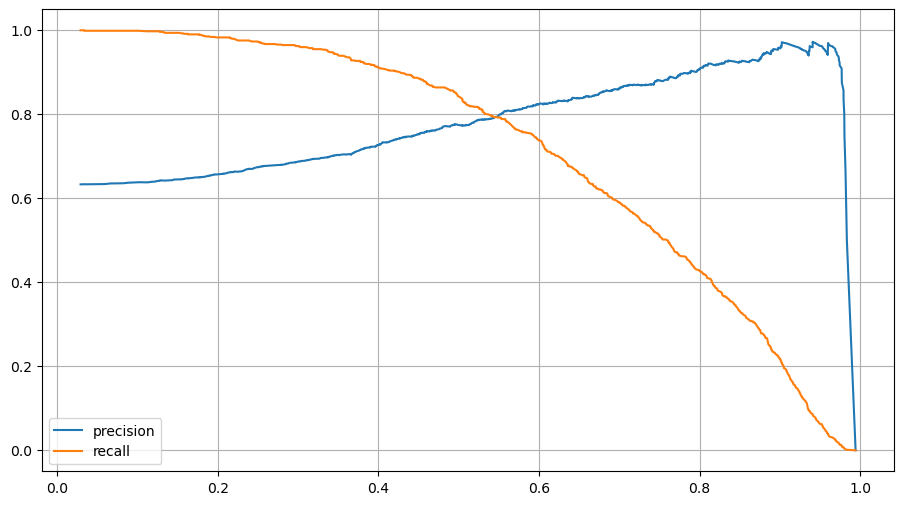

In [44]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(11,6))
pred = lr.predict_proba(X_test)[:,1] # 클래스가 1이 될 확률만 추출
precisions, recalls, thresholds = precision_recall_curve(y_test, pred)

plt.plot(thresholds, precisions[:len(thresholds)], label = 'precision')
plt.plot(thresholds, recalls[:len(thresholds)], label = 'recall')
plt.grid()
plt.legend()
plt.show()

각 threshold가 변함에 따라 precision과 recall의 상황을 볼 수 있다.

하지만 threshold를 어떻게 바꿀 수 있는거지?

In [45]:
pred_proba = lr.predict_proba(X_test)  # predict를 호출하는 순간 우리는 threshold를 0.5로 사용하자고 한 것이다.
pred_proba[:3]

array([[0.40472417, 0.59527583],
       [0.51002386, 0.48997614],
       [0.10222708, 0.89777292]])

각 클래스일 확률이 저장된 것(pred_proba) 옆에 예측된 클래스(y_pred_test)를 붙여넣어보자.

y_pred_test는 옆으로 긴 행렬이므로 이를 세로로 바꿔준 후 pred_proba에 붙여줄 필요가 있다.

In [46]:
y_pred_test.reshape(-1,1) # 행은 숫자가 몇인지 모르겠으나, 열은 1로 맞춰주라.

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [47]:
import numpy as np

np.concatenate([pred_proba, y_pred_test.reshape(-1,1)], axis = 1)

array([[0.40472417, 0.59527583, 1.        ],
       [0.51002386, 0.48997614, 0.        ],
       [0.10222708, 0.89777292, 1.        ],
       ...,
       [0.22599343, 0.77400657, 1.        ],
       [0.6728131 , 0.3271869 , 0.        ],
       [0.31401232, 0.68598768, 1.        ]])

이제 threshold를 변경해가며 클래스의 예측값이 어떻게 바뀌는지 살펴보자.

threshold를 바꾸는데에 도움을 주는 라이브러리 : Binarizer

Binarizer 는 이항변수화 변환으로 연속형 변수를 특정 기준 값 이하는 0으로, 특정 기준값 초과는 1로 즉 두 개의 값만을 가지는 변수로 변환할 수 있게 도와준다.

Binarizer(threshold = 원하는 값).fit()

In [48]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.6).fit(pred_proba)
pred_bin = binarizer.transform(pred_proba)[:,1] # 클래스가 1일 때를 기준으로 0,1이 표현되는 열 추출
pred_bin

array([0., 0., 1., ..., 1., 0., 1.])

In [50]:
print(classification_report(y_test,pred_bin))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67       477
           1       0.82      0.74      0.78       823

    accuracy                           0.73      1300
   macro avg       0.72      0.73      0.72      1300
weighted avg       0.75      0.73      0.74      1300



# 앙상블 기법

## HAR 데이터

In [51]:
import pandas as pd

url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt'

# \s+ : 공백 문자(스페이스, 탭, 개행 등)
feature_name_df = pd.read_csv(url, sep = '\s+', header = None,
                              names = ['column_index', 'column_name'])
feature_name_df.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [52]:
feature_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   column_index  561 non-null    int64 
 1   column_name   561 non-null    object
dtypes: int64(1), object(1)
memory usage: 8.9+ KB


In [54]:
feature_name = feature_name_df.iloc[:,1].values.tolist() # 리스트 형태로 바꿔줌
feature_name[:5]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y']

In [81]:
X_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/X_train.txt'
X_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/X_test.txt'

X_train = pd.read_csv(X_train_url, sep = '\s+', header = None)
X_test = pd.read_csv(X_test_url, sep = '\s+', header = None)

X_train.columns = feature_name
X_test.columns = feature_name

X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [59]:
y_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/y_train.txt'
y_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/y_test.txt'

y_train = pd.read_csv(y_train_url, sep = '\s+', header = None, names = ['action'])
y_test = pd.read_csv(y_test_url, sep = '\s+', header = None, names = ['action'])

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

In [61]:
# 각 액션별 데이터의 수

y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

각 라벨별 정의는 아래와 같다.

1. Walking
2. Walking Upstairs
3. Walking Downstairs
4. Sitting
5. Standing
6. Laying

Decision Tree를 먼저 이용해보자.

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

accuracy_score(y_test, pred)

0.8096369189005769

max_depth를 다양하게 해보자.

In [101]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring = 'accuracy', 
                       cv = 5, return_train_score=True)

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=24, random_state=13),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [64]:
grid_cv.best_score_ # 검증 데이터 세트에 대한 best score

0.8543335321892183

In [65]:
grid_cv.best_params_

{'max_depth': 8}

In [68]:
grid_cv.cv_results_

{'mean_fit_time': array([1.40788884, 1.68235192, 1.91177135, 2.12799163, 2.4124609 ,
        2.43536649, 2.4493259 ]),
 'std_fit_time': array([0.11779924, 0.03296575, 0.08995898, 0.10402736, 0.1703916 ,
        0.21835112, 0.20548122]),
 'mean_score_time': array([0.00740809, 0.00840082, 0.00696683, 0.00696788, 0.00707889,
        0.00672545, 0.00749798]),
 'std_score_time': array([0.00103495, 0.00144862, 0.00059405, 0.00059104, 0.00020266,
        0.00037037, 0.00060017]),
 'param_max_depth': masked_array(data=[6, 8, 10, 12, 16, 20, 24],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 6},
  {'max_depth': 8},
  {'max_depth': 10},
  {'max_depth': 12},
  {'max_depth': 16},
  {'max_depth': 20},
  {'max_depth': 24}],
 'split0_test_score': array([0.81509177, 0.82324949, 0.81781101, 0.79401768, 0.79469748,
        0.8028552 , 0.80013596]),
 'split1_test_score': array([0.86811693, 0.82528892, 0.

In [66]:
# 원하는 결과값만 뽑아보자.

cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.843444,0.944879
1,8,0.854334,0.982692
2,10,0.847125,0.993369
3,12,0.841958,0.997212
4,16,0.841958,0.999660
5,20,0.842365,0.999966
6,24,0.841821,1.000000


train과 test의 score차이가 있는데 과적합이 된건가? 라고 생각되면 직접 accuracy_score를 출력해볼 수도 있다.

In [98]:
# 실제 테스트 데이터에 대한 accuracy

max_depths = [6,8,10,12,16,20,24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state = 13)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    acc = accuracy_score(y_test, pred)
    print("Max_Depth : ", depth, ", Accuracy : ", acc )

Max_Depth :  6 , Accuracy :  0.8554462164913471
Max_Depth :  8 , Accuracy :  0.8734306073973532
Max_Depth :  10 , Accuracy :  0.8615541228367831
Max_Depth :  12 , Accuracy :  0.8595181540549711
Max_Depth :  16 , Accuracy :  0.8669833729216152
Max_Depth :  20 , Accuracy :  0.8652867322701052
Max_Depth :  24 , Accuracy :  0.8652867322701052


테스트 데이터에서도 accuracy가 max_depth가 8일 때 가장 성능이 좋아보인다.

In [102]:
# 우리의 베스트 모델 결과는

best_dt_clf = grid_cv.best_estimator_
pred1 = best_dt_clf.predict(X_test)

print('Best model : ', best_dt_clf)
print("Accuracy : ", accuracy_score(y_test, pred1))

Best model :  DecisionTreeClassifier(max_depth=8, random_state=13)
Accuracy :  0.8734306073973532


랜덤포레스트(앙상블 bagging 기법)도 돌려보자.

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth' : [6,8,10],
    'n_estimators' : [50,100,200], # Decision Tree 분류기 개수
    'min_samples_leaf' : [8,12], # 마지막 가지에 남아있는 최소 데이터 개수
    'min_samples_split' : [8,12] # 노드 당 최소 데이터 개수
}

rf_clf = RandomForestClassifier(random_state=13, n_jobs = -1)
# n_jobs = -1 : CPU를 다 써서 학습을 시켜라

grid_cv = GridSearchCV(rf_clf, param_grid=params, cv = 2, n_jobs= -1)
grid_cv.fit(X_train, y_train)

c:\Users\nabi4\anaconda3\envs\ds_study\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

In [83]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_max_depth']
cv_results_df[target_col].sort_values('rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
28,1,0.915125,100,10
25,1,0.915125,100,10
23,3,0.912813,200,8
20,3,0.912813,200,8
35,5,0.912541,200,10


In [75]:
grid_cv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 100}

In [76]:
rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(X_train, y_train)
pred1 = rf_clf_best.predict(X_test)

accuracy_score(y_test, pred1)

C:\Users\nabi4\AppData\Local\Temp\ipykernel_6732\14755469.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf_best.fit(X_train, y_train)


0.9205972175093315

중요 특성 확인

In [84]:
best_cols_values = rf_clf_best.feature_importances_
best_cols = pd.Series(best_cols_values, index = X_train.columns)
top20_cols = best_cols.sort_values(ascending = False)[:20]
top20_cols

angle(X,gravityMean)               0.034638
tGravityAcc-max()-Y                0.032518
tGravityAcc-energy()-X             0.031309
tGravityAcc-mean()-X               0.029513
tGravityAcc-min()-X                0.027775
tGravityAcc-max()-X                0.027662
angle(Y,gravityMean)               0.026553
tGravityAcc-mean()-Y               0.026052
tGravityAcc-min()-Y                0.023037
tGravityAcc-energy()-Y             0.018678
tGravityAcc-mean()-Z               0.015688
angle(Z,gravityMean)               0.012837
fBodyAcc-mad()-X                   0.012558
tBodyAcc-max()-X                   0.011970
fBodyAccJerk-bandsEnergy()-1,24    0.011803
tBodyAccJerk-entropy()-X           0.011647
tGravityAccMag-std()               0.011451
tBodyAccJerk-energy()-X            0.011333
tGravityAcc-arCoeff()-Z,1          0.011257
fBodyAccJerk-max()-X               0.011040
dtype: float64

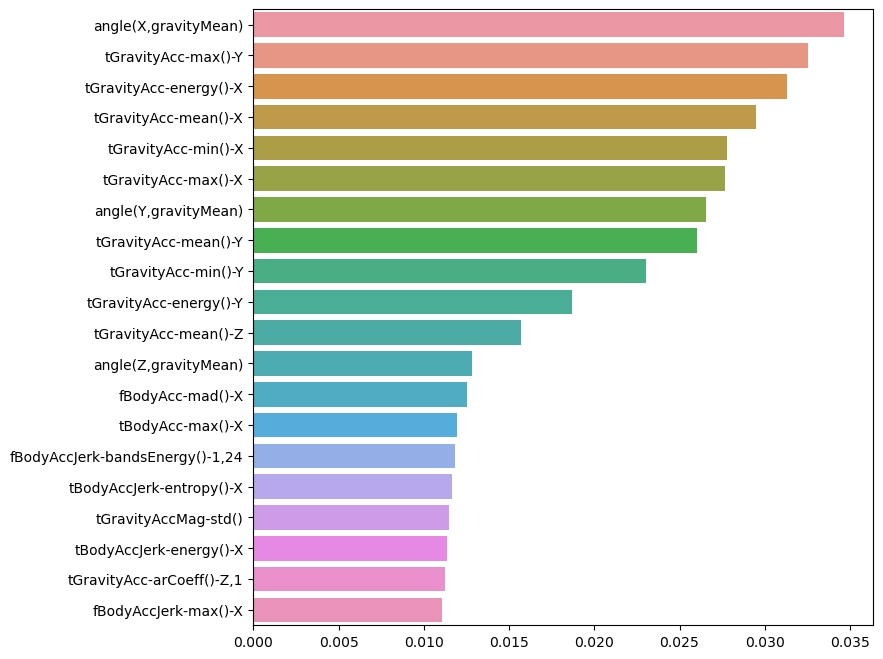

In [85]:
import seaborn as sns

plt.figure(figsize = (8,8))
sns.barplot(x = top20_cols, y = top20_cols.index)
plt.show()

계산량을 고려하여 중요 feature들만 가지고 모델링을 할 수도 있다.

In [86]:
top20_cols.index

Index(['angle(X,gravityMean)', 'tGravityAcc-max()-Y', 'tGravityAcc-energy()-X',
       'tGravityAcc-mean()-X', 'tGravityAcc-min()-X', 'tGravityAcc-max()-X',
       'angle(Y,gravityMean)', 'tGravityAcc-mean()-Y', 'tGravityAcc-min()-Y',
       'tGravityAcc-energy()-Y', 'tGravityAcc-mean()-Z',
       'angle(Z,gravityMean)', 'fBodyAcc-mad()-X', 'tBodyAcc-max()-X',
       'fBodyAccJerk-bandsEnergy()-1,24', 'tBodyAccJerk-entropy()-X',
       'tGravityAccMag-std()', 'tBodyAccJerk-energy()-X',
       'tGravityAcc-arCoeff()-Z,1', 'fBodyAccJerk-max()-X'],
      dtype='object')

In [90]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [95]:
X_train[top20_cols.index].head()

,"angle(X,gravityMean)",tGravityAcc-max()-Y,tGravityAcc-energy()-X,tGravityAcc-mean()-X,tGravityAcc-min()-X,tGravityAcc-max()-X,"angle(Y,gravityMean)",tGravityAcc-mean()-Y,tGravityAcc-min()-Y,tGravityAcc-energy()-Y,...,fBodyAcc-mad()-X,tBodyAcc-max()-X,"fBodyAccJerk-bandsEnergy()-1,24","fBodyAccJerk-bandsEnergy()-1,24","fBodyAccJerk-bandsEnergy()-1,24",tBodyAccJerk-entropy()-X,tGravityAccMag-std(),tBodyAccJerk-energy()-X,"tGravityAcc-arCoeff()-Z,1",fBodyAccJerk-max()-X
0,-0.841247,-0.161265,0.899469,0.963396,0.977436,0.892055,0.179941,-0.140840,-0.123213,-0.970905,...,-0.996889,-0.934724,-0.999981,-0.999852,-0.999844,-0.819949,-0.950551,-0.999935,-0.995112,-0.996737
1,-0.844788,-0.161343,0.907829,0.966561,0.984520,0.892060,0.180289,-0.141551,-0.114893,-0.970583,...,-0.997890,-0.943068,-0.999974,-0.999630,-0.999835,-0.875096,-0.976057,-0.999960,-0.833882,-0.997425
2,-0.848933,-0.163711,0.908668,0.966878,0.986770,0.892401,0.180637,-0.142010,-0.114893,-0.970368,...,-0.994097,-0.938692,-0.999909,-0.999613,-0.999775,-0.753629,-0.988020,-0.999894,-0.705039,-0.995163
3,-0.848649,-0.163711,0.910621,0.967615,0.986821,0.893817,0.181935,-0.143976,-0.121336,-0.969400,...,-0.994547,-0.938692,-0.999927,-0.999806,-0.999824,-0.820804,-0.986421,-0.999924,-0.385410,-0.993402
4,-0.847865,-0.166786,0.912235,0.968224,0.987434,0.893817,0.185151,-0.148750,-0.121834,-0.967051,...,-0.997725,-0.942469,-0.999975,-0.999830,-0.999900,-0.850744,-0.991275,-0.999969,-0.237474,-0.997009


In [96]:
# 20개 특성만 가지고 모델링 다시

X_train_re = X_train[top20_cols.index]
X_test_re = X_test[top20_cols.index]

rf_clf_best_re = grid_cv.best_estimator_
rf_clf_best_re.fit(X_train_re, y_train)

pred1_re = rf_clf_best_re.predict(X_test_re)
accuracy_score(y_test, pred1_re)

C:\Users\nabi4\AppData\Local\Temp\ipykernel_6732\3824118638.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf_best_re.fit(X_train_re, y_train)


0.8177807940278249